In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from scipy import stats
from scipy.stats import linregress

from sigmalypse.main import MetricsLab
from sigmalypse.main import MeasureBOda

In [2]:
df_tracker = pd.read_csv("data/tracker.csv", usecols=['t', 'x', 'y'])
df_tracker.head()

,t,x,y
0,0.000000,0.000144,0.000246
1,0.033480,-0.009313,0.000295
2,0.066959,-0.018081,0.001692
3,0.100439,-0.026997,0.001872
4,0.133919,-0.036958,0.004577


In [3]:
df_tracker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       1910 non-null   float64
 1   x       1910 non-null   float64
 2   y       1910 non-null   float64
dtypes: float64(3)
memory usage: 44.9 KB


Text(0, 0.5, 'Distancia (m)')

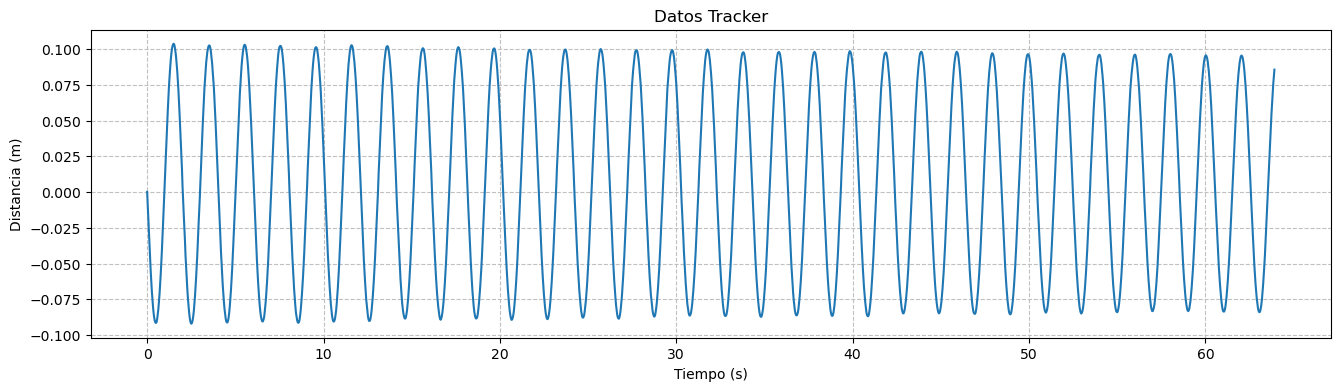

In [28]:
plt.figure(figsize=(16, 4))
plt.plot(df_tracker['t'], df_tracker['x'])

plt.title("Datos Tracker")
plt.grid(True, color='silver', linestyle='--', linewidth=0.8)
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia (m)")

In [5]:
# Cargar el DataFrame, omitiendo la columna vacía
df_tracker = pd.read_csv("data/tracker.csv", usecols=['t', 'x', 'y'])

# Convertir las columnas a arrays de NumPy
t_arr = df_tracker['t'].to_numpy()
x_arr = df_tracker['x'].to_numpy()

# Calcular el valor medio de la señal para definir el punto medio (puedes usar 0 si la señal está centrada)
mid_val = np.mean(x_arr)

# Detectar los cruces ascendentes: donde la señal pasa de estar por debajo a estar por encima del valor medio
crossings = np.where((x_arr[:-1] < mid_val) & (x_arr[1:] >= mid_val))[0]

# Seleccionar el intervalo entre el primer cruce y el cruce número 31 (30 períodos completos)
t_start = t_arr[crossings[0]]
t_end = t_arr[crossings[31]]

# Cortar el DataFrame usando el intervalo de tiempo definido
df_30 = df_tracker[(df_tracker['t'] >= t_start) & (df_tracker['t'] <= t_end)]

In [6]:
t = df_30['t'].values
x = df_30['x'].values

# Calcular los cruces por 0 de forma precisa mediante interpolación lineal
zero_crossings = []
for i in range(len(x) - 1):
    if x[i] < 0 and x[i+1] >= 0:
        # Interpolación lineal para hallar el instante exacto en que x cruza 0
        t_cross = t[i] + (t[i+1] - t[i]) * (-x[i]) / (x[i+1] - x[i])
        zero_crossings.append(t_cross)
zero_crossings = np.array(zero_crossings)

# Omitir el primer cruce (ya que no cuenta) y conservar el resto
if zero_crossings.size > 0:
    zero_crossings = zero_crossings[1:]

# Reducir el intervalo: desde el primer cruce (después de omitir el primero) hasta el último
if zero_crossings.size > 0:
    t_interval_start = zero_crossings[0]
    t_interval_end = zero_crossings[-1]
else:
    t_interval_start = t[0]
    t_interval_end = t[-1]

# Crear un DataFrame reducido usando el intervalo definido
df_reduced = df_tracker[(df_tracker['t'] >= t_interval_start) & (df_tracker['t'] <= t_interval_end)]

# Filtrar los cruces que se encuentran dentro del intervalo reducido
zc_in_interval = zero_crossings[(zero_crossings >= t_interval_start) & (zero_crossings <= t_interval_end)]

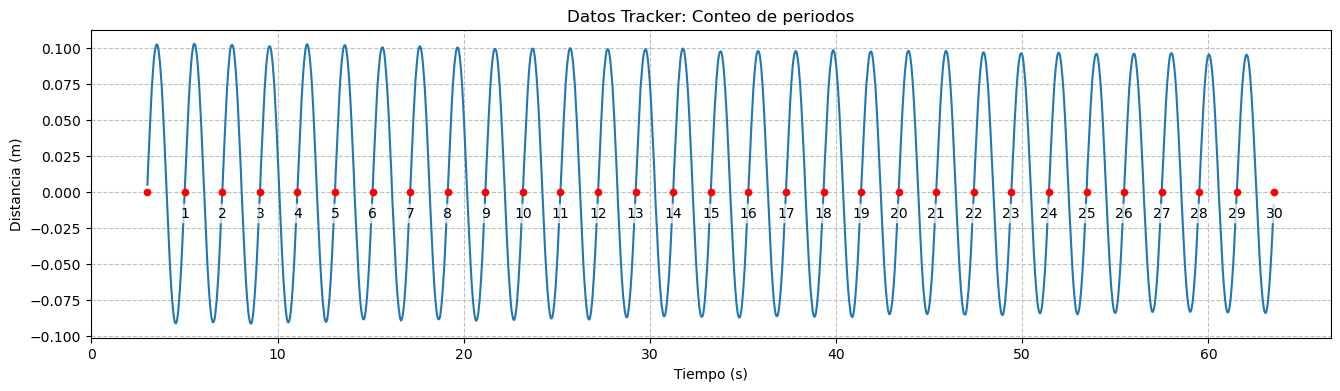

In [37]:
# Graficar la señal en el intervalo reducido y marcar (con numeración) los cruces por 0
plt.figure(figsize=(16, 4))
plt.plot(df_reduced['t'], df_reduced['x'])

for i, tzc in enumerate(zc_in_interval):
    plt.plot(tzc, 0, 'ro', markersize=4.5)
    if i > 0:
        plt.text(
            tzc, 0 - 0.01, f'{i}',
            fontsize=10,
            ha='center',
            va='top',
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2', edgecolor='none')
        )

plt.title("Datos Tracker: Conteo de periodos")
plt.grid(True, color='silver', linestyle='--', linewidth=0.8)
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia (m)")
plt.show()

In [8]:
periods = np.diff(zc_in_interval)

# Mostrar los períodos de oscilación
print("Los períodos de oscilación (duraciones) son:")
for i, period in enumerate(periods, start=1):
    print(f"Periodo {i}: {period:.4f} s")

Los períodos de oscilación (duraciones) son:
Periodo 1: 2.0165 s
Periodo 2: 2.0206 s
Periodo 3: 2.0217 s
Periodo 4: 2.0128 s
Periodo 5: 2.0187 s
Periodo 6: 2.0172 s
Periodo 7: 2.0203 s
Periodo 8: 2.0186 s
Periodo 9: 2.0193 s
Periodo 10: 2.0186 s
Periodo 11: 2.0157 s
Periodo 12: 2.0199 s
Periodo 13: 2.0186 s
Periodo 14: 2.0169 s
Periodo 15: 2.0210 s
Periodo 16: 2.0166 s
Periodo 17: 2.0158 s
Periodo 18: 2.0196 s
Periodo 19: 2.0190 s
Periodo 20: 2.0160 s
Periodo 21: 2.0188 s
Periodo 22: 2.0192 s
Periodo 23: 2.0162 s
Periodo 24: 2.0189 s
Periodo 25: 2.0192 s
Periodo 26: 2.0182 s
Periodo 27: 2.0148 s
Periodo 28: 2.0202 s
Periodo 29: 2.0199 s
Periodo 30: 2.0179 s


In [9]:
df_le = pd.read_csv("data/instrumentos.csv")

In [10]:
df_le["tracker"] = periods
df_le["tracker"] = df_le["tracker"].round(3)
df_le

,fotocompuerta,cronometro,tracker
0,2.016,2.12,2.017
1,2.016,2.22,2.021
2,2.017,1.97,2.022
3,2.017,2.09,2.013
4,2.016,2.03,2.019
5,2.016,2.07,2.017
6,2.016,1.94,2.020
7,2.016,2.09,2.019
8,2.015,1.97,2.019
9,2.016,1.94,2.019


In [11]:
df_le.to_csv("data/instrumentos.csv", index=False)

In [12]:
lab = MetricsLab(units={"L": "cm", "M": "g", "T": "s"})
lab.add_table_from_csv("data/instrumentos.csv", name="instrumentos", units={"fotocompuerta": "s", "cronometro": "s", "tracker": "s"})
lab.add_table_from_csv("data/gravedad.csv", name="gravedad", units={"g=24.5-24.3": "s"})
lab.add_table_from_csv("data/variacion_altura.csv", name="altura", units={
    "2m": "s",
    "1.9m": "s",
    "1.8m": "s",
    "1.7m": "s",
    "1.6m": "s",
    "1.5m": "s",
    "1.4m": "s",
    "1.3m": "s",
    "1.2m": "s",
    "1.1m": "s"
})

Tabla 'instrumentos' añadida exitosamente.
Tabla 'gravedad' añadida exitosamente.
Tabla 'altura' añadida exitosamente.


In [13]:
def histogram(data: np.ndarray, measure_obj: str):
    mean = np.mean(data)
    std = np.std(data)
    counts, bins, _ = plt.hist(data, bins=7, edgecolor="black", linewidth=0.5, alpha=0.6)

    x = np.linspace(min(data), max(data))
    y = stats.norm.pdf(x, mean, std)
    y_scaled = y * max(counts) / max(y)

    plt.plot(x, y_scaled, 'r', linewidth=2, label='Campana de Gauss')
    # plt.title(f"Frecuencias del péndulo ({measure_obj})")
    # plt.xlabel("Período (s)")
    # plt.ylabel("Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()

def calculate_period(measure_col: pd.Series, unc_obj: float, sig_values: int):
    mean = float(measure_col.mean())
    std = float(measure_col.std())
    unc_total = sqrt(std**2 + unc_obj**2)
    unc_percent = unc_total / mean
    return (
        round(mean, sig_values),
        round(std, sig_values),
        round(unc_obj, sig_values),
        round(unc_total, sig_values),
        round(unc_percent * 100, 2)
    )

def gravity_and_uncertainty(T, dT, L=1.0, dL=0.005):
    """
    Calcula la aceleración gravitatoria (g) y su incertidumbre a partir de
    el periodo de un péndulo utilizando la propagación de la incertidumbre.
    """
    pi = np.pi
    g = 4 * pi**2 * L / T**2
    relative_dL = dL / L
    relative_dT = 2 * dT / T
    dg = g * np.sqrt(relative_dL**2 + relative_dT**2)
    return g, dg


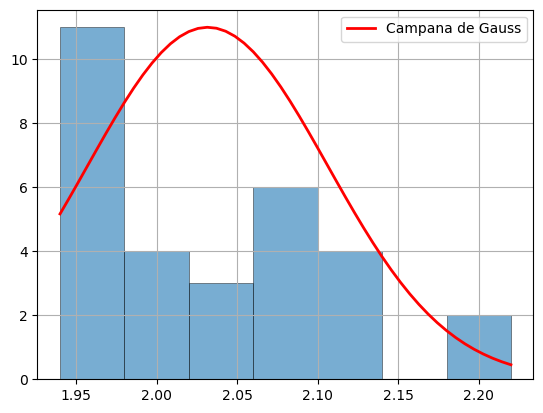

In [14]:
histogram(lab.tables["instrumentos"]["data"]["cronometro"], "Crónometro")

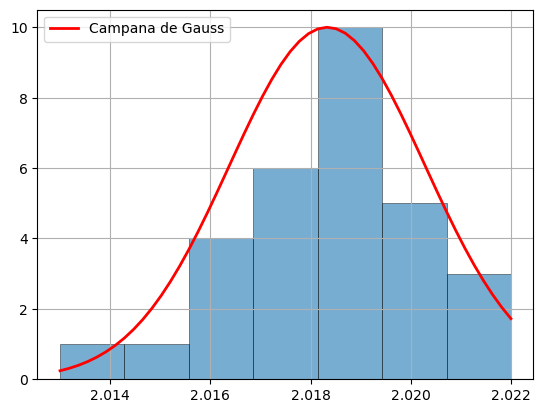

In [15]:
histogram(lab.tables["instrumentos"]["data"]["tracker"], "Tracker")

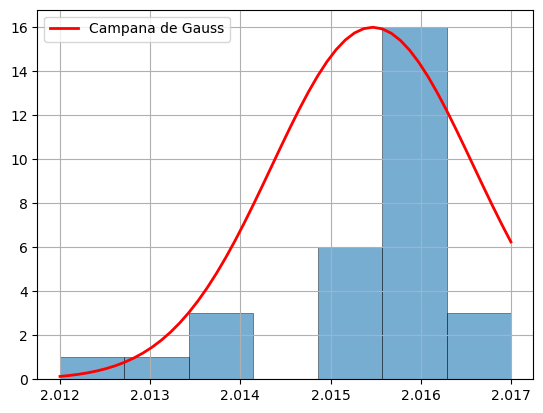

In [16]:
histogram(lab.tables["instrumentos"]["data"]["fotocompuerta"], "Fotocompuerta")

In [17]:
# Instrumental uncertainties (adjusted with n = 25)
ins_unc_f = 0.0001 / sqrt(25)
ins_unc_c = 0.1 / sqrt(25)
ins_unc_t = 0.03 / sqrt(25)

# Calculate using the updated function
mean_f, std_f, ins_f, unc_f, unc_perc_f = calculate_period(lab.tables["instrumentos"]["data"]["fotocompuerta"], ins_unc_f, 4)
mean_c, std_c, ins_c, unc_c, unc_perc_c = calculate_period(lab.tables["instrumentos"]["data"]["cronometro"], ins_unc_c, 2)
mean_t, std_t, ins_t, unc_t, unc_perc_t = calculate_period(lab.tables["instrumentos"]["data"]["tracker"], ins_unc_t, 3)

# Create the table
data = {
    "Valor promedio": [mean_f, mean_c, mean_t],
    "Desviación estándar": [std_f, std_c, std_t],
    "Incertidumbre instrumental": [ins_f, ins_c, ins_t],
    "Incertidumbre total": [unc_f, unc_c, unc_t],
    "Incertidumbre porcentual (%)": [unc_perc_f, unc_perc_c, unc_perc_t]
}

index = ["Fotocompuerta", "Cronómetro", "Tracker"]
df = pd.DataFrame(data, index=index)

# Calculate g and its uncertainty
df["gravedad"] = df.apply(lambda row: gravity_and_uncertainty(row["Valor promedio"], row["Incertidumbre total"])[0], axis=1)
df["incertidumbre_gravedad"] = df.apply(lambda row: gravity_and_uncertainty(row["Valor promedio"], row["Incertidumbre total"])[1], axis=1)

# Calculate percent error in g
df["error_gravedad (%)"] = df.apply(
    lambda row: round(row["incertidumbre_gravedad"] / row["gravedad"] * 100, 2), axis=1
)

# Round g and its uncertainty
df["gravedad"] = df["gravedad"].round(2)
df["incertidumbre_gravedad"] = df["incertidumbre_gravedad"].round(2)
df

,Valor promedio,Desviación estándar,Incertidumbre instrumental,Incertidumbre total,Incertidumbre porcentual (%),gravedad,incertidumbre_gravedad,error_gravedad (%)
Fotocompuerta,2.0155,0.0011,0.000,0.0011,0.06,9.72,0.05,0.51
Cronómetro,2.0300,0.0800,0.020,0.0800,3.86,9.58,0.76,7.90
Tracker,2.0180,0.0020,0.006,0.0060,0.31,9.69,0.08,0.78


In [18]:
# Instrumental uncertainty (photogate, 5 measurements)
ins_unc = 0.0001 / sqrt(5)

# Transpose the data table and rename columns
df_transposed = lab.tables["altura"]["data"].T
df_transposed.columns = [f"medicion_{i+1}" for i in range(df_transposed.shape[1])]
df_transposed["altura_m"] = df_transposed.index.astype(str).str.replace("m", "").astype(float)

# Calculate results for each height
results = []

for i, row in df_transposed.iterrows():
    measurements = row[:-1]  # exclude 'altura_m'
    mean, std, ins, unc_total, unc_percent = calculate_period(measurements, ins_unc, 4)
    results.append({
        "Altura (m)": row["altura_m"],
        "Periodo promedio (s)": mean,
        "Desviación estándar (s)": std,
        "Incertidumbre instrumental (s)": ins,
        "Incertidumbre total (s)": unc_total,
        "Incertidumbre porcentual (%)": unc_percent
    })

# Create final DataFrame
df_results = pd.DataFrame(results).sort_values("Altura (m)", ascending=False)
df_results

,Altura (m),Periodo promedio (s),Desviación estándar (s),Incertidumbre instrumental (s),Incertidumbre total (s),Incertidumbre porcentual (%)
0,2.0,2.8830,0.0041,0.0,0.0041,0.14
1,1.9,2.7768,0.0008,0.0,0.0008,0.03
2,1.8,2.6948,0.0004,0.0,0.0004,0.02
3,1.7,2.6288,0.0011,0.0,0.0011,0.04
4,1.6,2.5484,0.0009,0.0,0.0009,0.04
5,1.5,2.4622,0.0018,0.0,0.0018,0.07
6,1.4,2.3828,0.0008,0.0,0.0008,0.04
7,1.3,2.3022,0.0020,0.0,0.0020,0.09
8,1.2,2.2048,0.0008,0.0,0.0008,0.04
9,1.1,2.1086,0.0009,0.0,0.0009,0.04


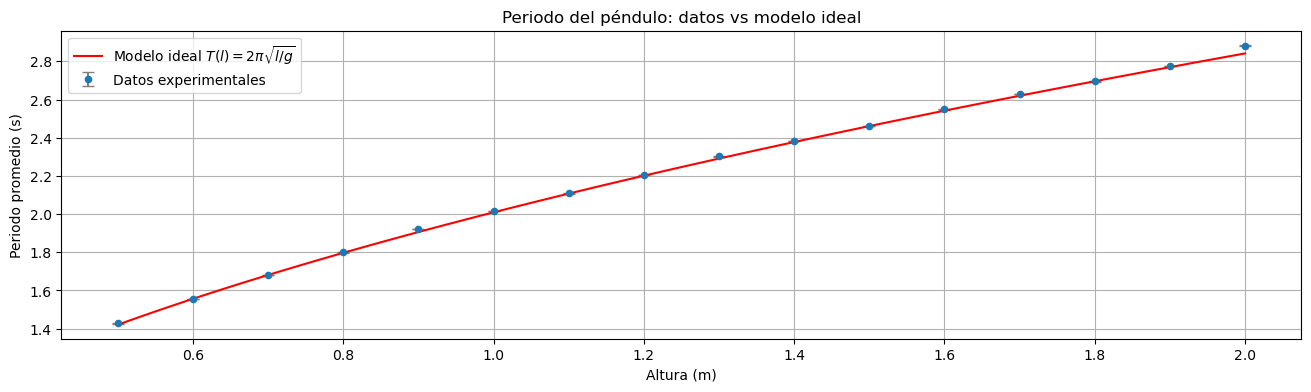

In [19]:
g = 9.779  # m/s²

# Generar curva teórica con T(l) = 2π * sqrt(l/g)
l_theoretical = np.linspace(df_results["Altura (m)"].min(), df_results["Altura (m)"].max(), 100)
T_theoretical = 2 * np.pi * np.sqrt(l_theoretical / g)

# Graficar
plt.figure(figsize=(16, 4))

# Datos experimentales
plt.errorbar(
    df_results["Altura (m)"],
    df_results["Periodo promedio (s)"],
    yerr=df_results["Incertidumbre total (s)"],
    fmt='o',
    markersize=4.5,
    ecolor='gray',
    capsize=4,
    label="Datos experimentales"
)

# Curva teórica
plt.plot(l_theoretical, T_theoretical, label="Modelo ideal $T(l) = 2\\pi \\sqrt{l / g}$", color="red")

plt.xlabel("Altura (m)")
plt.ylabel("Periodo promedio (s)")
plt.title("Periodo del péndulo: datos vs modelo ideal")
plt.grid(True)
plt.legend()
plt.show()

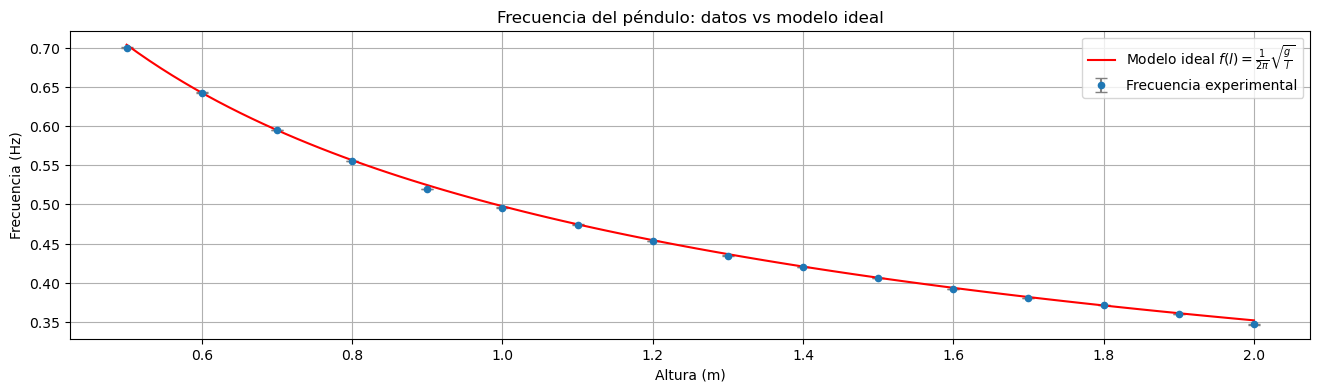

In [20]:
# Calcular frecuencia y su incertidumbre si no están en el DataFrame
df_results["Frecuencia promedio (Hz)"] = 1 / df_results["Periodo promedio (s)"]
df_results["Incertidumbre frecuencia (Hz)"] = (
        df_results["Incertidumbre total (s)"] / df_results["Periodo promedio (s)"]**2
).round(4)

# Curva teórica: f(l) = (1 / 2π) * sqrt(g / l)
l_theoretical = np.linspace(df_results["Altura (m)"].min(), df_results["Altura (m)"].max(), 100)
f_theoretical = (1 / (2 * np.pi)) * np.sqrt(g / l_theoretical)

# Gráfica
plt.figure(figsize=(16, 4))

plt.errorbar(
    df_results["Altura (m)"],
    df_results["Frecuencia promedio (Hz)"],
    yerr=df_results["Incertidumbre frecuencia (Hz)"],
    fmt='o',
    markersize=4.5,
    ecolor='gray',
    capsize=4,
    label="Frecuencia experimental"
)

plt.plot(
    l_theoretical,
    f_theoretical,
    label="Modelo ideal $f(l) = \\frac{1}{2\\pi} \\sqrt{\\frac{g}{l}}$",
    color="red"
)

plt.xlabel("Altura (m)")
plt.ylabel("Frecuencia (Hz)")
plt.title("Frecuencia del péndulo: datos vs modelo ideal")
plt.grid(True)
plt.legend()
plt.show()

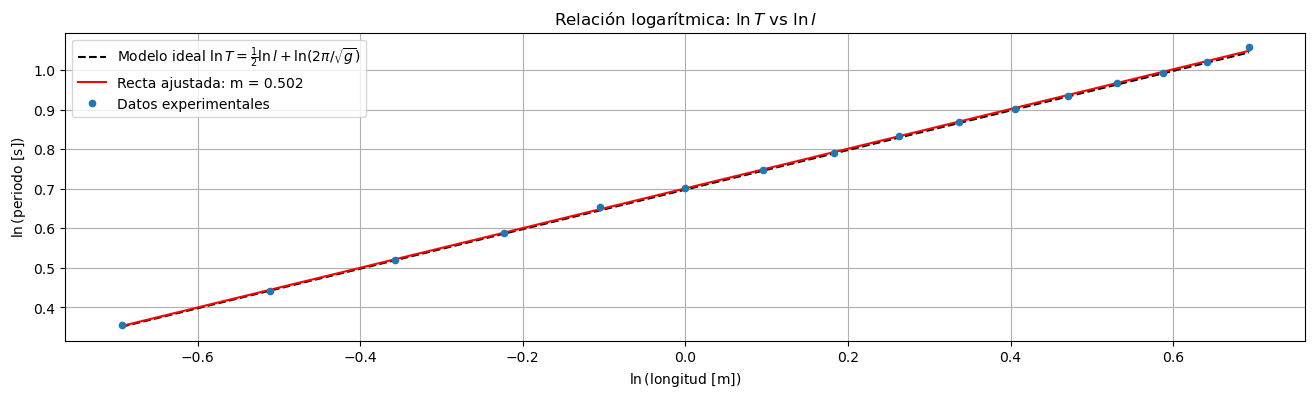

In [21]:
# Extract data
length = df_results["Altura (m)"]
period = df_results["Periodo promedio (s)"]

# Compute natural logarithms
ln_l = np.log(length)
ln_T = np.log(period)

# Linear regression on experimental data
slope, intercept, r_value, p_value, std_err = linregress(ln_l, ln_T)

# Ideal model line (slope = 1/2)
ln_l_theoretical = np.linspace(ln_l.min(), ln_l.max(), 100)
ln_T_theoretical = 0.5 * ln_l_theoretical + np.log(2 * np.pi / np.sqrt(g))

# Plot
plt.figure(figsize=(16, 4))

# Theoretical model line
plt.plot(
    ln_l_theoretical,
    ln_T_theoretical,
    '--',
    label="Modelo ideal $\\ln T = \\frac{1}{2} \\ln l + \\ln(2\\pi / \\sqrt{g})$",
    color="black"
)

# Best fit line for experimental data
ln_T_fit = slope * ln_l + intercept
plt.plot(
    ln_l,
    ln_T_fit,
    color="red",
    label=f"Recta ajustada: m = {slope:.3f}"
)

# Experimental data
plt.plot(
    ln_l,
    ln_T,
    'o',
    markersize=4.5,
    label="Datos experimentales"
)

# Labels in Spanish
plt.xlabel("$\\ln$(longitud [m])")
plt.ylabel("$\\ln$(periodo [s])")
plt.title("Relación logarítmica: $\\ln T$ vs $\\ln l$")
plt.grid(True)
plt.legend()
plt.show()

In [23]:
mean, std, ins_unc, unc_total, unc_percent = calculate_period(lab.tables["gravedad"]["data"], ins_unc, 4)

# Create DataFrame with Spanish labels
df_1s = pd.DataFrame([{
    "Periodo promedio (s)": mean,
    "Desviación estándar (s)": std,
    "Incertidumbre instrumental (s)": ins_unc,
    "Incertidumbre total (s)": unc_total,
    "Incertidumbre porcentual (%)": f"{unc_percent} %"
}])

df_1s


/tmp/ipykernel_35969/739599115.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean = float(measure_col.mean())
/tmp/ipykernel_35969/739599115.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  std = float(measure_col.std())


,Periodo promedio (s),Desviación estándar (s),Incertidumbre instrumental (s),Incertidumbre total (s),Incertidumbre porcentual (%)
0,1.0012,0.0022,0.0,0.0022,0.22 %
